# Model configuration summary

**Control run name**: Southern Shelf

**Perturbation run name**: Southern Shelf + Drake Passage + Northern Weddell Ridge

**Key**:<br/>
SS: Southern Shelf<br/>
DP: Drake Passage<br/>
NWR: Northern Weddell Ridge<br/>

**Model Config**:<br/>

|       Parameter      |      Value     |                    Description                    |
|:--------------------:|:--------------:|:-------------------------------------------------:|
|         $L_x$        |     4000 km    |                 Zonal domain dize                 |
|         $L_x$        |     2500 km    |               Meridonial domain size              |
|          $H$         |     4000 m     |                   Maximum ocean depth             |
| $\Delta x, \Delta y$ |   $\sim$10 km  |                Horizontal grid spacing            |
|      $\Delta t$      |      617 s     |                   Time step size                  |
|      $\Delta z$      |   5$-$200 m    |                 vertical grid spacing             |
|         $L_r$        |     100 km     |    Meridional width of northern<br>sponge layer   |
|       $\tau_r$       |     7 days     | Relaxation time scale of<br>northern sponge layer |
|    $\Theta_{AABW}$   | -1 $^{\circ}$C |             Temperature of AABW source            |
|      $X_{AABW}$      |     -500 km    |        Location of AABW source<br>on shelf        |
|   $\Delta X_{AABW}$  |     400 km     |          Width of AABW source<br>on shelf         |
|   (To be continued)  |                |                                                   |

# Analysis set-up

In [1]:
# import necessary modules
import numpy as np
import helper_functions as hf
import plot_functions as pf
import matplotlib.pylab as plt
import overturning_funcs as of
import imp
import xarray as xr
import os

# enforce reload (might be redundant)
imp.reload(hf)
imp.reload(pf)
imp.reload(of)

# Set directory
exp_dir = '/central/groups/AndyThompsonGroup/earlew/MITgcm_PG/experiments/'  # For HPC
#exp_dir = '/Users/ewilson/research/modeling/MITgcm_PG/experiments'  # Office iMac mirror
hf.set_exp_dir(exp_dir)

# define general plotting and analysis parameters
exp_names = ['gyre_ctrl_run_128n_50yr_SS', 'gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR']
exp_names_alias = ['Southern Shelf', 'Southern Shelf + DP + NWR']
fz = 14  # fontsize
tr = [235, 245] # year range for averaging

# Bathymetry and forcing

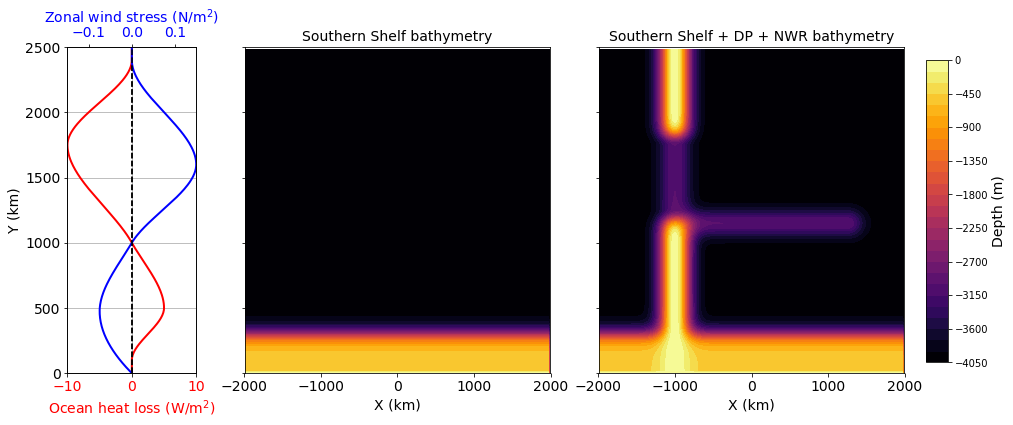

In [2]:
imp.reload(pf)
pf.plot_bathy_tau_surfq_v2(exp_names, exp_names_alias, fz=14, save_plots=True)

In [3]:
##--------Uncomment below to get bathymetry map without forcing------------##
# imp.reload(pf)
# pf.plot_bathy_2D(exp_names, exp_names_alias)

In [4]:
##--------Uncomment below to get 3D bathymetry plots------------##
#imp.reload(pf)
#pf.plot_bathy_3D(exp_names_list, exp_names_alias, save_plots=False)

# Accessment of model equilibrium

### Domain-averaged temperature

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_50yr_SS...
Loading gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR...


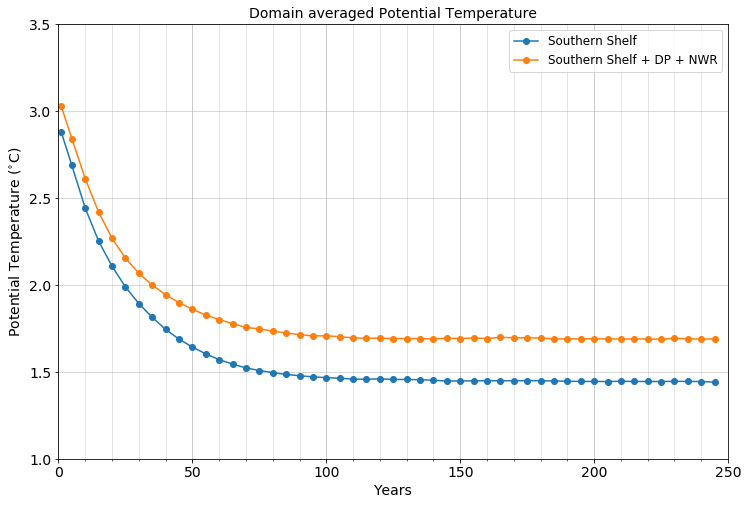

In [18]:
imp.reload(pf)
pf.plot_mean_temp_series(exp_names, exp_names_alias, suppress_err_msg=True)

The above plot shows the domain-averaged temperature timeseries for the `SS` and `SS+DP+NWR` experiments. Each point represents the instantaneous temperature average. By this metric, both model runs appear to stabilize after roughly 125 years, with the `SS` run asymptoting towards a notably cooler temperature.

### Bottom temperature

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_50yr_SS...
Loading gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR...


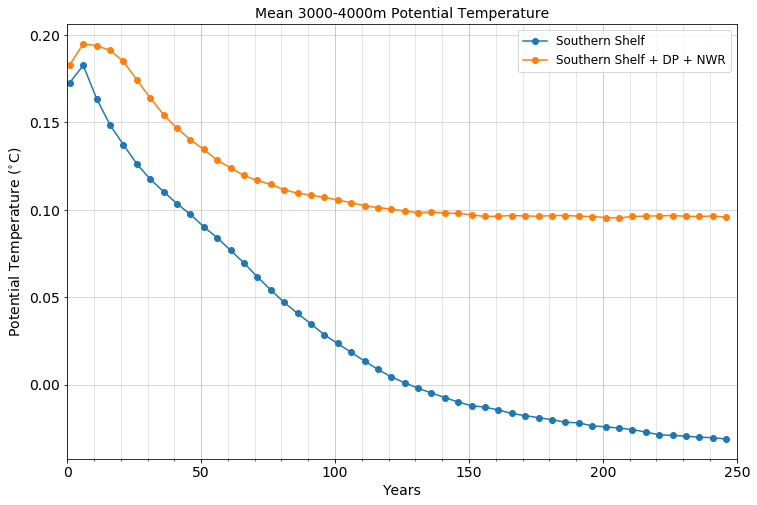

In [4]:
imp.reload(pf)
pf.plot_mean_temp_series(exp_names, exp_names_alias=exp_names_alias, 
                         zr=[-4000, -3000], suppress_err_msg=True)

However, the bottom temperature trends show that the `SS` run has not come to a full equilibrium–even after 250 years. Closer inspection of the temperature stratifications reveals that the bottom water is still advancing northward in this run. In any event, it is clear that the `SS` run will end up being much cooler than the `SS + DP + NWR` run.

### Domain-integrated kinetic energy

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_50yr_SS...
Loading gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR...


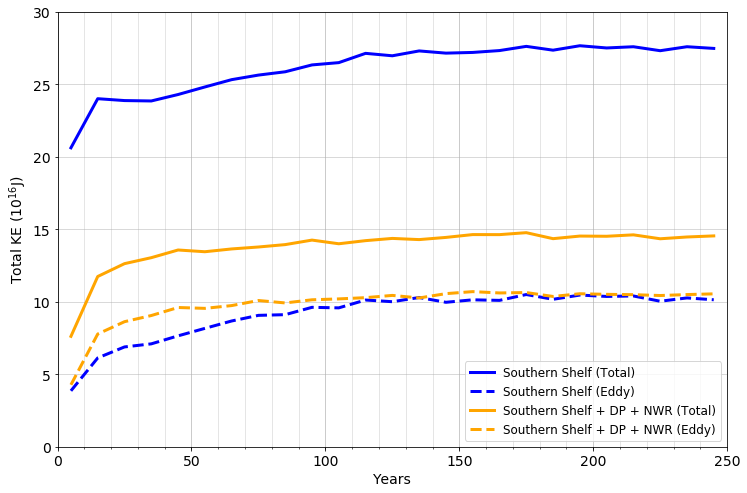

In [5]:
imp.reload(pf)
pf.plot_TKE_series(exp_names, exp_names_alias, tstep=2, suppress_err_msg=True)

Like the domain mean temperatures, the domain mean kinetic energy appears to equilibrate after roughly 125 years. It's interesting that the total eddy KE equilibrate to roughly the same value in both cases.

# Layer-averaged properties 

The plots below represent an average of the years $235-245$.

### Near-surface temperature

Loading THETA for years 235-245...
Loading THETA for years 235-245...


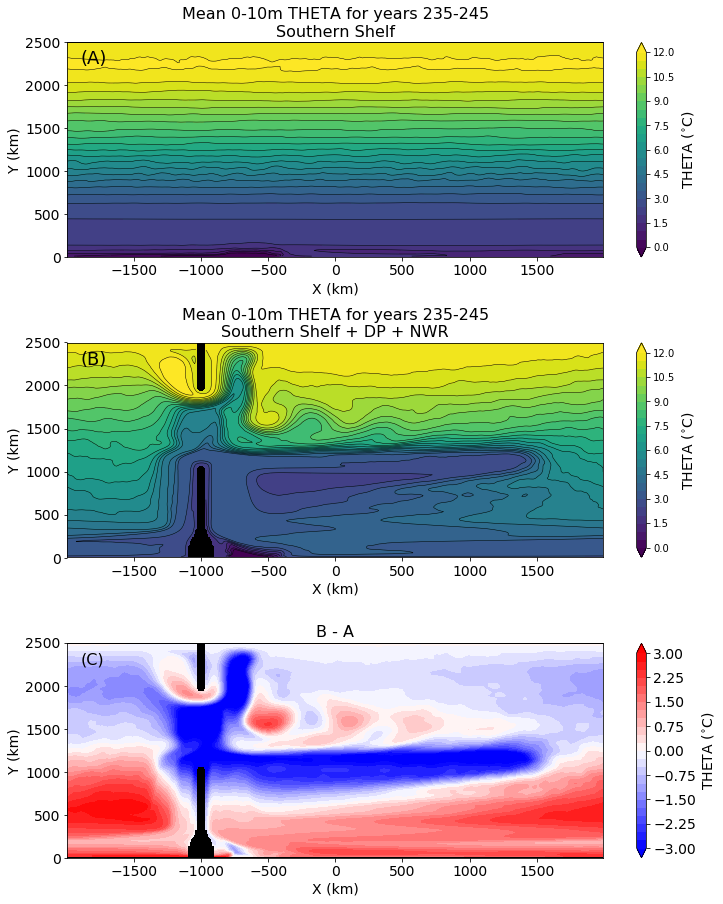

In [5]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-0, 12.01, 0.5)
clvls_ano = np.arange(-3.0, 3.1, 0.25)
vname = 'THETA'
pf.plot_layer_avg_anom(exp_names, vname, tr, zr, 
                       exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

With the added of topography, we observe warmer surface temperatures in the the southern portion of the domain and cooler temperatures further north. The cold anomalies are most pronounced near the Drake Passage, and along the northern Weddell Ridge (NWR). The meridional asymmetry in these temperature anomalies suggests that merdional exchanges are enhanced in the `SS + DP + NWR` run. That said, the intense cooling along the NWR is more indicative of enhanced upwelling.

In [6]:
##------------uncomment below for temp average between 200-400 m----------------##
# imp.reload(hf)
# imp.reload(pf)
# zr = [200, 400]
# clvls = np.arange(-0, 10.01, 0.5)
# clvls_ano = np.arange(-3.0, 3.1, 0.25)
# vname = 'THETA'
# pf.plot_layer_avg_anom(exp_names, vname, tr, zr, 
#                        exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

### Bottom temperatures

Loading THETA for years 235-245...
Loading THETA for years 235-245...


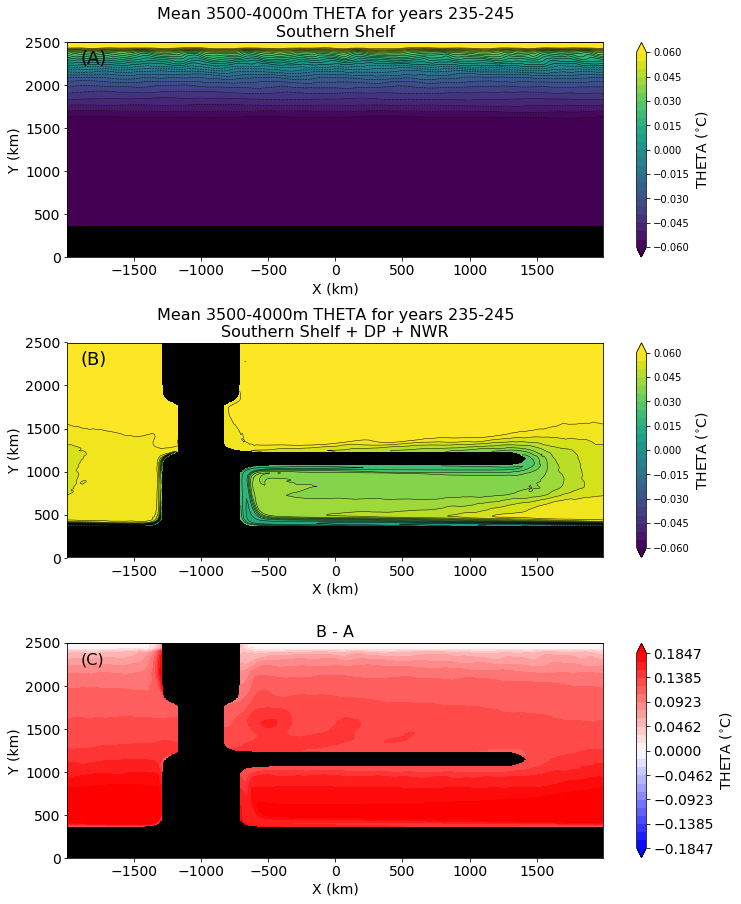

In [7]:
##------------uncomment below for temp average between 3500-4000 m----------------##
imp.reload(hf)
imp.reload(pf)
zr = [3500, 4000]
clvls = np.arange(-0.06, 0.061, 0.005)
clvls_ano = []
vname = 'THETA'
pf.plot_layer_avg_anom(exp_names, vname, tr, zr, 
                       exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

A comparison of bottom temperatures reveal a much warmer abyssal ocean in the case with added topography. In (A), we see that cold shelf waters have filled much of the abssyal ocean.  However, the strong gradients along the northern boundary suggest that these temperatures have not yet come into equilibrium. Overtime one would expect that these gradients will weaken substantially.

In (B), we see that the bottom water coming off the shelf is much warmer and is largely confined to the Weddell Sea embayment. These waters may still be spreading northward, albeit at a very slow pace.

### Sea surface height

Loading PHIHYD for years 235-245...
Loading PHIHYD for years 235-245...
Loading THETA for years 235-245...


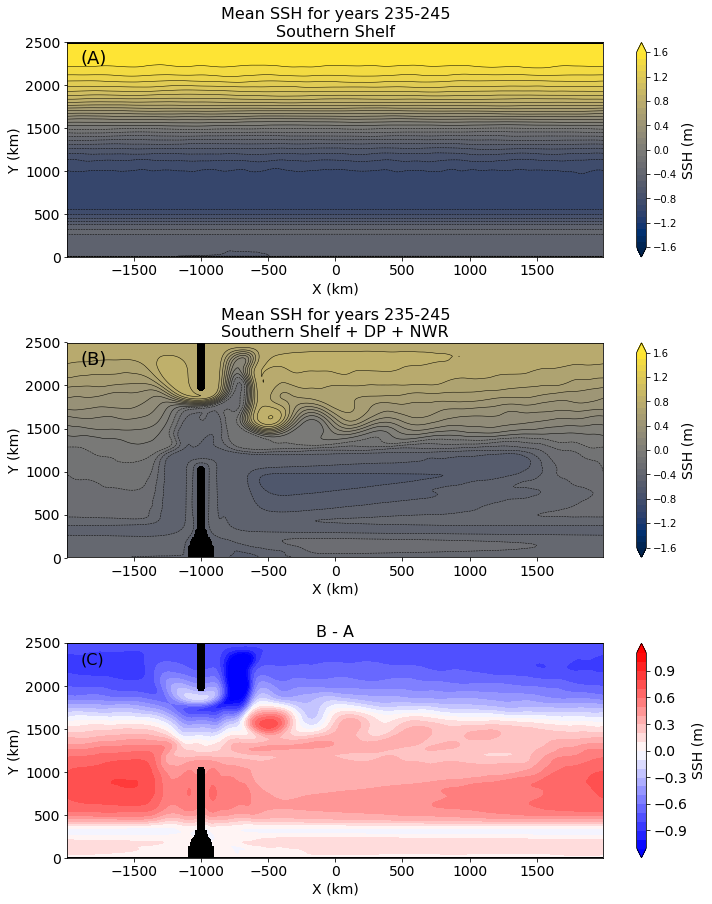

In [8]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-1.6, 1.61, 0.1)
clvls_ano = np.arange(-1.1, 1.11, 0.1)
vname = 'SSH'
pf.plot_layer_avg_anom(exp_names, vname, tr, zr, exp_names_alias=exp_names_alias, 
                       clvls=clvls, clvls_ano=clvls_ano, cmap=plt.cm.cividis, fz=14)

The patterns in sea surface height (SSH) are similar to those of near-surface temperature but with a few subtle differences. (C) shows that the added topography reduces the meridonial SSH gradient across the domiain. This is consistent with there being more meridional heat exchanges in the `SS + DP + NWR` run. (B) also illustrates that a gyre-like circulation forms immediately east of the "Antarctic Peninsula". This plot also nicely showcases the standing meanders that develop just downstream of the Drake Passage. In (B), we also see that SSH lines diverge slightly just upstream of Drake Passage before strongly converging as they pass through the channel.

# Zonal sections

### Zonal velocity across the "Atlantic" sector

Loading UVEL for years 235-245...
Loading UVEL for years 235-245...


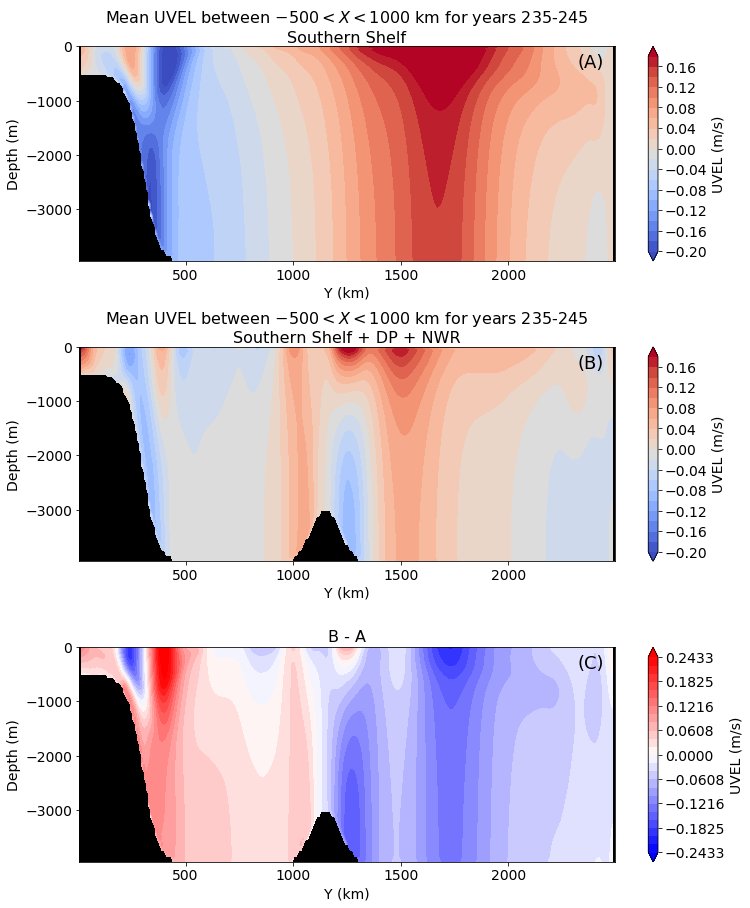

In [9]:
imp.reload(pf)
imp.reload(hf)
#tr = [89, 91]
xr = [-500e3, 1000e3]
clvls = np.arange(-0.2, 0.2, 0.02)
vname = 'UVEL'
pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, exp_names_alias=exp_names_alias, 
                        clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

The above plot shows the latitude-depth section of zonal velocities, averaged between $-500 < X < 1000$km, corresponding to the "Atlantic" sector. Consistent with the weaker meridional SSH gradient, zonal velocities are much weaker in `SS + DP + NWR` run. This is perhaps largely due to the addition of the Drake Passage sill, which introduces a form stress that can dampen the acceleration due to winds. 

In both runs, there is some semblance of a baroclinic shelf-slope current. However, the vertical structure and magnitude of the shelf-slope current is notable different in both cases. In (B), there is an enhancement of zonal velocity on either side of the northern Weddell ridge. Interestingly, there is a much stronger baroclinicity on the northern slope of the ridge.

### Meridional velocity across the "Atlantic" sector

Loading VVEL for years 235-245...
Loading VVEL for years 235-245...


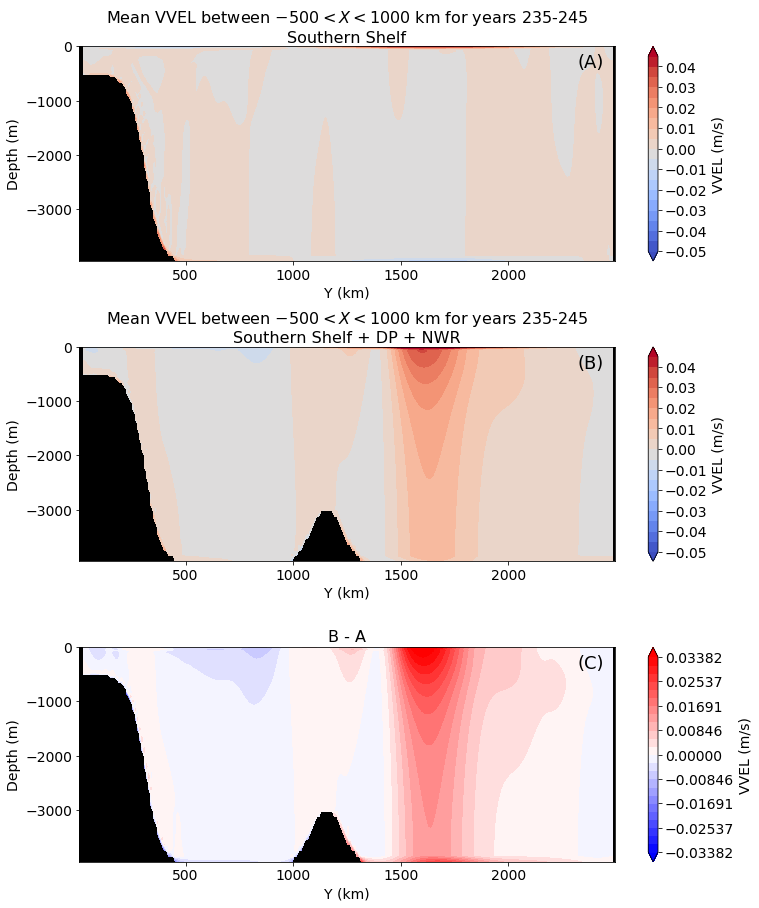

In [10]:
imp.reload(pf)
imp.reload(hf)
#tr = [89, 91]
xr = [-500e3, 1000e3]
clvls = np.arange(-0.05, 0.05, 0.005)
vname = 'VVEL'
pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, exp_names_alias=exp_names_alias, 
                        clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

Not a whole lot to see here. The changes in meridional velocity are mostly associated with the standing meanders downstream of the Drake Passage

### Temperature stratification across the "Atlantic" sector

Loading THETA for years 235-245...
Loading THETA for years 235-245...


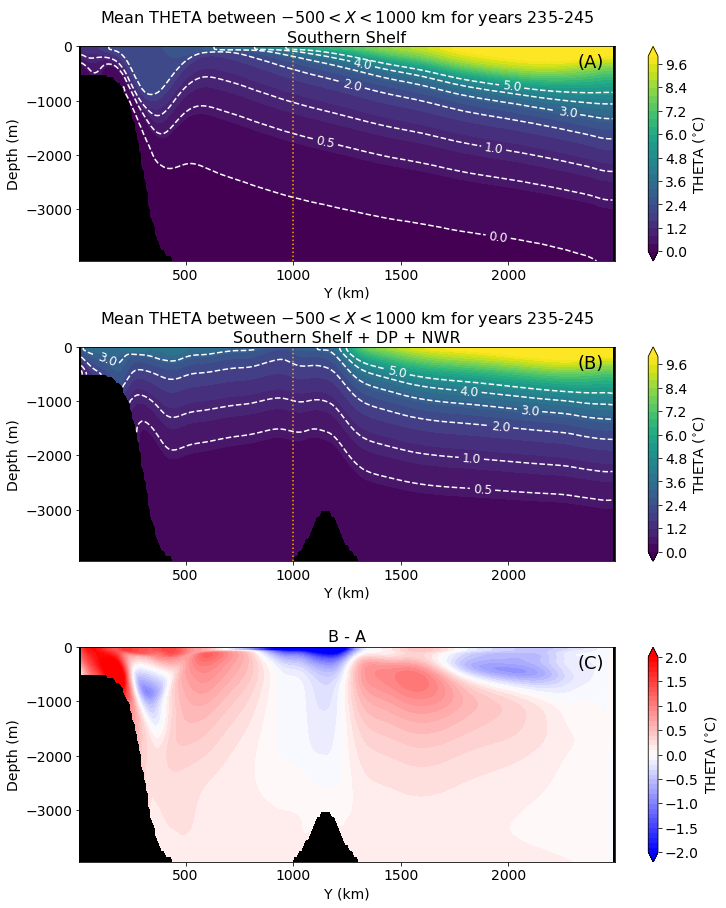

In [11]:
imp.reload(hf)
imp.reload(pf)

#tr = [89, 91]
xr = [-500e3, 1000e3]
clvls = np.arange(-0, 10.01, 0.4)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'
pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14)

Along the same zonal section, we observe drastic differences in the temperature stratification. In (B) we see a strong upward displacement of isotherms above the northern slope of the NWR. These isotherms then plataeu before gently sloping downwards towards the continental shelf. Just before they reach the shelf, the isopycnals upwell by a few hundred meters before they intesect on the slope. Similar patterns are observed in WOCE transects across the Weddell Sea. 

In (B) we also see that there is a subtle downwelling of isotherms north of the ridge between $Y=1200-2200$ km. Consistent with the enhanced meridional heat flux, the shelf region is much warmer with the added topography.

The orange vertical lines in (A) and (B) delineate where the surface heat fluxes change sign. North of this line, the surface layers receive a net warming. In (B), we observe that a larger fraction of deep water upwells north of this line. This would imply a strengthening of the upper overturning cell of the Southern Ocean. However,...

### Temperature stratification across the "Pacific" sector

Loading THETA for years 235-245...
Loading THETA for years 235-245...


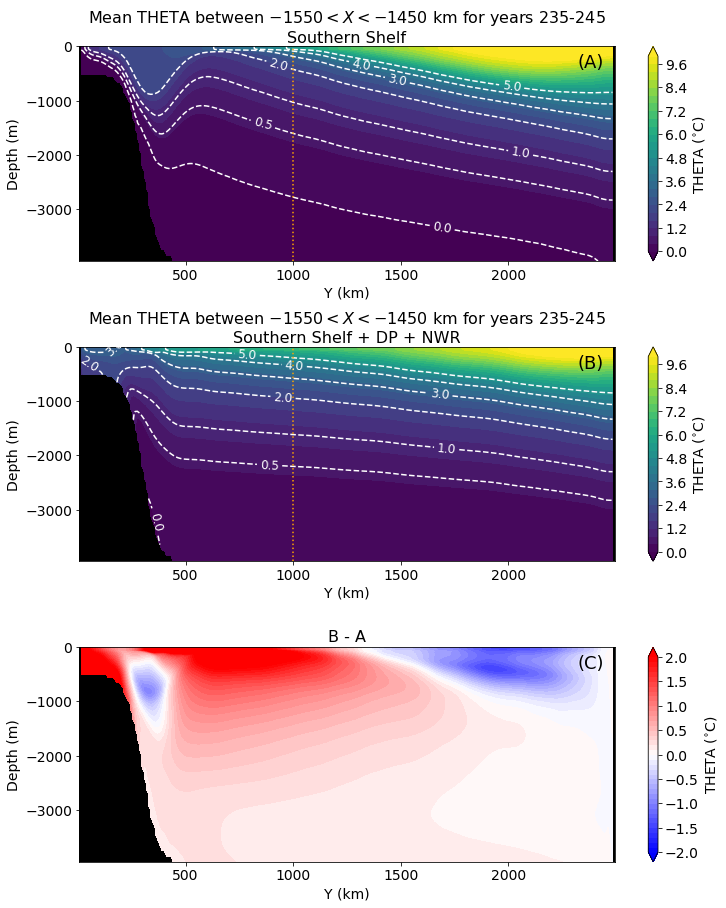

In [12]:
imp.reload(hf)
imp.reload(pf)
xr = [-1550e3, -1450e3]
clvls = np.arange(-0, 10.01, 0.4)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'
pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, clvls=clvls, exp_names_alias=exp_names_alias,  
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14)

In the Pacific sector, the stratification is notably different. In the absense of a zonal ridge to force upwelling, isotherms maintain an approximately constant slope before they eventually outcrop in the shelf slope region. In this sector, deep water actually upwells **closer** to the continental shelf. *This implies that the added topography produces a strong zonal asymmetry in the watermass transformation that occurs in each basin.*


West of the Drake Passage, there is a strong warming across the southern half of the domain in the `SS + DP + NWR` run. This is consistent with a southward shift in the circumpolar current just upstream of the Drake Passage, which is also evident in the SSH plots.

# Overturning circulation

In [13]:
##------------uncomment below to compute overturning streamfunctions----------------##
# imp.reload(of)
# of.calcOverturning(exp_names[0], tr)
# of.calcOverturning(exp_names[1], tr)

### Residual overturning in z-coordinates

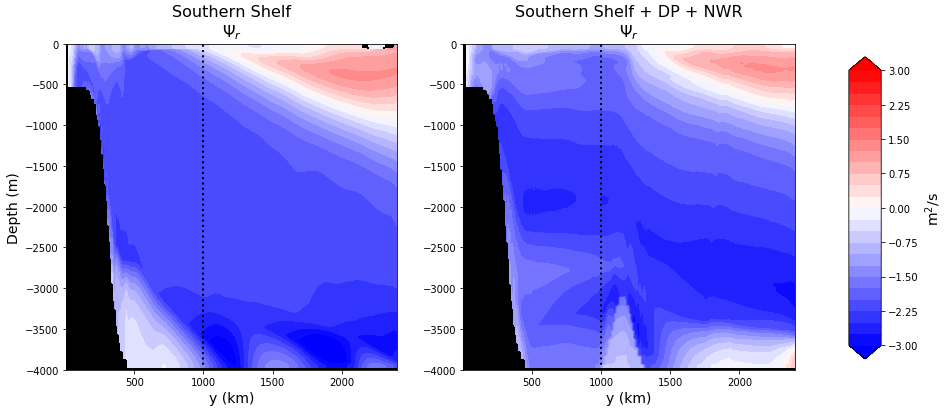

In [14]:
imp.reload(of)
imp.reload(pf)

clvls = np.arange(-3, 3.1, 0.25)
pf.plot_psi_z_comp(exp_names, tr, exp_names_alias=exp_names_alias, clvls=clvls, plot_mode=0)

The above plots show the zonally-integrated, residual overturning circulation $\Psi_r$ for both runs. Here, the dotted vertical line shows where surface heat flux changes sign. Consistent with the pattern in stratification, deep water upwells  further north (on average) in the case with additional topography. 

In contrast to the `SS` run which has bottom-intensified lower overturning cell, the core of the lower overturning cell in the `SS+DP+NWR` run occurs at mid-depth. The magnitude of this shoaling is much higher south of the NWR. Additionally, overturning appears to be intensified along the slopes of the NWR in the `SS+DP+NWR` run.

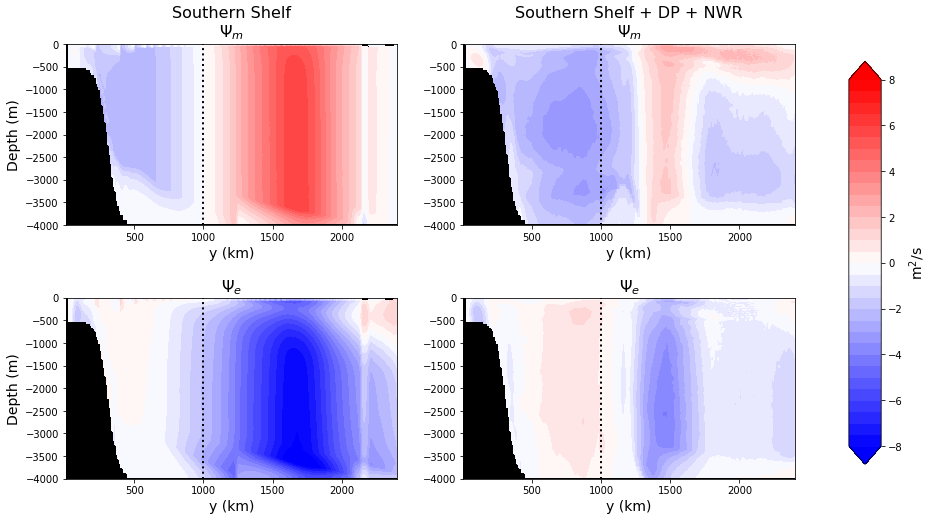

In [15]:
clvls = np.arange(-8, 8.1, 0.5)
#tr = [200, 210] # year range for averaging
pf.plot_psi_z_comp(exp_names, tr, exp_names_alias=exp_names_alias, clvls=clvls, plot_mode=1)

Decomposing $\Psi_r$ into its mean $\Psi_m$ and $\Psi_e$ components reveals drastically different overturning stuctures. Here, we note that $\Psi_m$ is simply time-mean component of $\Psi_r$. For the `SS+DP+NWR`, $\Psi_m$ therefore captures the effect of standing meanders in the circumpolar current. This is perhaps what accounts for most of the differences between the two runs. However, we note that $\Psi_m$ is slightly stronger south of $y\approx1200$km in the `SS+DP+NWR`. This is a manifestation of the cyclonic gyre that develops west of the Antarctic Peninsula.

**Note**: After year 200 or so, an unusual artifact started appearing in the $\Psi_m$ field near $Y=2200$ km in the `SS` run. I'm not quite sure what's going on here but it might be tied to the northward advancement of bottom water.

### Residual overturning in temperature-coordinates

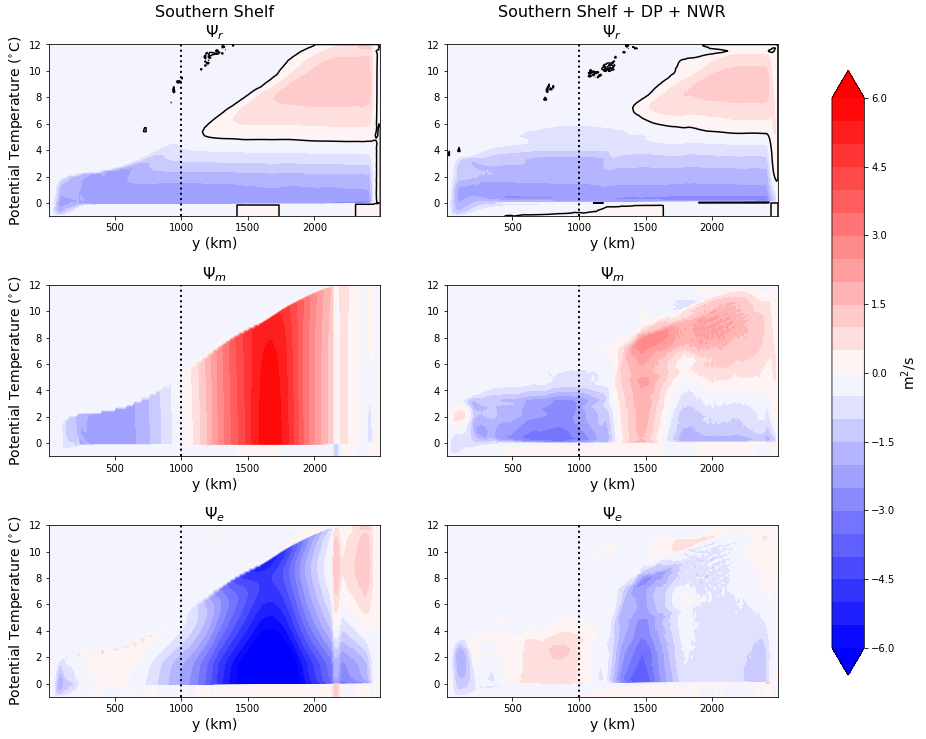

In [16]:
imp.reload(of)
imp.reload(pf)
clvls = np.arange(-6, 6.1, 0.5)
pf.plot_psi_pt_comp(exp_names, tr, exp_names_alias=exp_names_alias,clvls=clvls)

The above plots show the overturning streamfunction in temperature-latitude space. As before, the vertical dashed line demarcates where the surface heating switches sign. In the top plots, the black contour outlines the $\Psi=0$ m$2$/s contour. In these plots it is more clear that the upper cell of $\Psi_r$ contracts northward in the `SS + DP + NWR` run. This is accompanied by an expansion of the lower cell, which now occupies warmer temperatures further south...

## Miscellaneous code formating (ignore)

In [17]:
%%html
<style>
table {float:left}
</style>